# Preparando o dataset

### Importando bibliotecas

In [ ]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import MultipleLocator
from sklearn.linear_model import Ridge

In [ ]:
data = pd.read_csv('cafezes_mockdata.csv')

In [ ]:
data.head()

,sale_date,product_name,product_category,product_description,sale_channel,production_cost,sale_price
0,31/1/2024,Colombian Comfort,Catimor,Smooth and nutty with a caramel finish,whatsapp,138.61,202.81
1,15/11/2024,Caramel Creme Dream,Excelsa,Rich and bold with hints of chocolate,web-site,139.47,204.26
2,1/8/2024,Jamaican Java Joy,Catimor,Light and crisp with a citrus twist,in-store,138.59,193.34
3,14/4/2024,Morning Blend Magic,Liberica,Dark roast with a smoky undertone,in-store,103.09,134.56
4,24/6/2024,French Vanilla Fantasy,Liberica,Dark roast with a smoky undertone,in-store,54.13,199.48


### Arrumando data types

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sale_date            1000 non-null   object 
 1   product_name         1000 non-null   object 
 2   product_category     1000 non-null   object 
 3   product_description  1000 non-null   object 
 4   sale_channel         1000 non-null   object 
 5   production_cost      1000 non-null   float64
 6   sale_price           1000 non-null   float64
dtypes: float64(2), object(5)
memory usage: 54.8+ KB


In [ ]:
data['sale_date'] = pd.to_datetime(data['sale_date'])

<ipython-input-5-e85fc794e898>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['sale_date'] = pd.to_datetime(data['sale_date'])


In [ ]:
data['product_name'] = data['product_name'].astype('string')
data['product_category'] = data['product_category'].astype('string')
data['product_description'] = data['product_description'].astype('string')
data['sale_channel'] = data['sale_channel'].astype('string')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   sale_date            1000 non-null   datetime64[ns]
 1   product_name         1000 non-null   string        
 2   product_category     1000 non-null   string        
 3   product_description  1000 non-null   string        
 4   sale_channel         1000 non-null   string        
 5   production_cost      1000 non-null   float64       
 6   sale_price           1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), string(4)
memory usage: 54.8 KB


### Transformando categorias em números inteiros

In [ ]:
num_data = pd.DataFrame([], columns=[])
num_data['sale_date'] = data['sale_date']
num_data['product_category'] = data['product_category']
num_data['sale_channel'] = data['sale_channel']
num_data['production_cost'] = data['production_cost']
num_data['sale_price'] = data['sale_price']

In [ ]:
# Criando o mapeamento manual
mapeamento_channel = {'whatsapp': 1, 'web-site': 2, 'in-store': 3, 'instagram': 4}
num_data['sale_channel'] = num_data['sale_channel'].map(mapeamento_channel)

In [ ]:
mapeamento_category = {'Catimor': 10, 'Excelsa': 20, 'Liberica': 30, 'Robusta': 40, 'Arabica':50}
num_data['product_category'] = num_data['product_category'].map(mapeamento_category)

In [ ]:
num_data.head()

,sale_date,product_category,sale_channel,production_cost,sale_price
0,2024-01-31,10,1,138.61,202.81
1,2024-11-15,20,2,139.47,204.26
2,2024-08-01,10,3,138.59,193.34
3,2024-04-14,30,3,103.09,134.56
4,2024-06-24,30,3,54.13,199.48


### Analise descritiva

In [ ]:
data['sale_date'].value_counts().sort_index()

In [ ]:
# Agrupando as vendas por dia
sales_count_day = pd.DataFrame([], columns=[])
sales_count_day['date'] = data['sale_date'].drop_duplicates().sort_values().reset_index(drop=True)
sales_count_day['sales'] = data['sale_date'].value_counts().sort_index().values
sales_count_day

In [ ]:
# Agrupando as vendas por mês
sales_count_day.set_index('date', inplace=True)
sales_count_month = sales_count_day.resample('M')['sales'].sum()
sales_count_month.index = sales_count_month.index.strftime('%m')

In [ ]:
sales_month = pd.DataFrame([], columns=[])
sales_month['month']= sales_count_month.index.values.astype('int')
sales_month['sales']= sales_count_month.values
sales_month

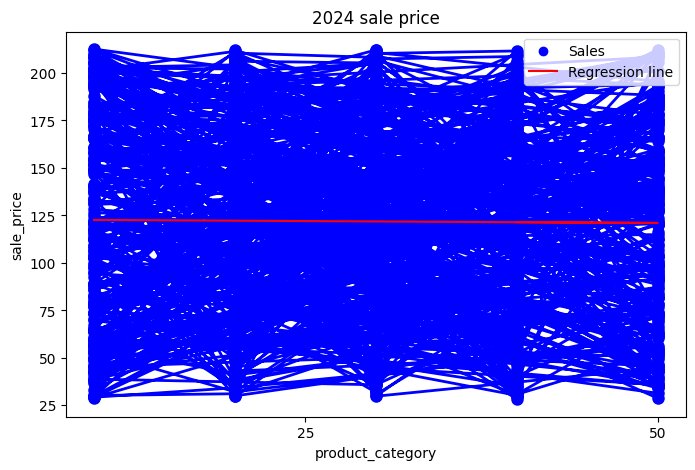

In [ ]:
# Plot de vendas por mês
X = num_data[['product_category']]
y = num_data['sale_price']
'''
model = LinearRegression()

model.fit(X, y)
'''

# Regressão Ridge (com regularização)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X, y)

# Faz previsões
predictions = ridge_model.predict(X)

fig, ax = plt.subplots(figsize=(8, 5))

ax.scatter(num_data['product_category'], num_data['sale_price'], color='blue', label='Sales')
ax.plot(num_data['product_category'], num_data['sale_price'], color='blue', linestyle='-', linewidth=2, marker='o', markersize=8)
plt.plot(num_data['product_category'], predictions, color='red', label='Regression line')

ax.xaxis.set_major_locator(MultipleLocator(25))

ax.set_xlabel("product_category")
ax.set_ylabel("sale_price")
ax.set_title("2024 sale price")

plt.legend()
plt.show()

In [ ]:
ridge_model.score(X, y)

0.00011264522010312472

# Predição de vendas

In [ ]:
num_data.head()

,sale_date,product_category,sale_channel,production_cost,sale_price
0,2024-01-31,10,1,138.61,202.81
1,2024-11-15,20,2,139.47,204.26
2,2024-08-01,10,3,138.59,193.34
3,2024-04-14,30,3,103.09,134.56
4,2024-06-24,30,3,54.13,199.48


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
train = num_data.drop(['sale_price', 'product_category', 'sale_channel'], axis=1)
test = num_data['sale_price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.3, random_state=42)

In [ ]:
regr = LinearRegression()

In [ ]:
regr.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred = regr.predict(X_test)

In [ ]:
pred

array([120.71896009, 122.92118833, 120.88925563, 123.12546076,
       120.87622128, 123.25725253, 121.10924152, 123.40508792,
       122.28368124, 122.47771596, 120.76470517, 122.05969536,
       123.34684497, 123.42960848, 123.51091566, 123.86293823,
       123.52903911, 121.8546819 , 121.16100185, 124.06766491,
       123.6466527 , 122.37278235, 122.75119243, 121.20118593,
       123.13393291, 123.37582306, 123.03904683, 121.02135184,
       124.40041541, 124.21903318, 121.84448606, 122.55676626,
       120.90889972, 121.97540943, 124.01517793, 123.81330262,
       123.18138882, 120.78228885, 122.93916675, 120.2266335 ,
       123.43130644, 122.66668429, 123.09753948, 122.1761732 ,
       122.68377337, 122.55302555, 121.36720429, 122.95460629,
       123.3956316 , 121.36898447, 121.43152706, 121.82142183,
       120.4733373 , 122.58626796, 123.3421506 , 121.98063548,
       122.04726029, 123.24961171, 121.53940234, 122.94356147,
       124.10337204, 122.41553582, 122.36203238, 122.71

In [ ]:
regr.score(X_test, y_test)

-0.004448999936403464